<a href="https://colab.research.google.com/github/jangalasriramd7/MachineLearning/blob/main/Heart_disease_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [22]:
data = pd.read_csv('DB_heart.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [23]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [29]:
import sklearn
from sklearn.linear_model import LogisticRegression
sklearn.metrics.accuracy_score(y_test,y_pred)

0.7866666666666666

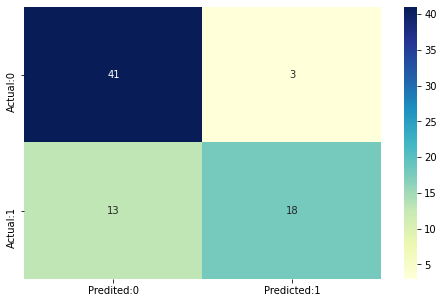

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predited:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [33]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [34]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7866666666666666 
 The Missclassification = 1-Accuracy =  0.21333333333333337 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.5806451612903226 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9318181818181818 
 Positive Predictive value = TP/(TP+FP) =  0.8571428571428571 
 Negative predictive Value = TN/(TN+FN) =  0.7592592592592593 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  8.516129032258059 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.4500393391030684


In [37]:
y_pred_prob=model.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.961575,0.038425
1,0.990349,0.009651
2,0.865145,0.134855
3,0.104965,0.895035
4,0.827803,0.172197


In [38]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=model.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[22 22]
 [ 3 28]] 
 with 50 correct predictions and 3 Type II errors( False Negatives) 

 Sensitivity:  0.9032258064516129 Specificity:  0.5 



With 0.2 threshold the Confusion Matrix is  
 [[30 14]
 [ 8 23]] 
 with 53 correct predictions and 8 Type II errors( False Negatives) 

 Sensitivity:  0.7419354838709677 Specificity:  0.6818181818181818 



With 0.3 threshold the Confusion Matrix is  
 [[35  9]
 [11 20]] 
 with 55 correct predictions and 11 Type II errors( False Negatives) 

 Sensitivity:  0.6451612903225806 Specificity:  0.7954545454545454 



With 0.4 threshold the Confusion Matrix is  
 [[40  4]
 [12 19]] 
 with 59 correct predictions and 12 Type II errors( False Negatives) 

 Sensitivity:  0.6129032258064516 Specificity:  0.9090909090909091 





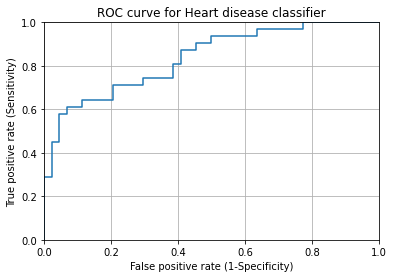

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [40]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.8343108504398826